In [62]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("fibonacci_sequence.csv")
print(df.head())

   Iteration Value
0          0     0
1          1     1
2          2     1
3          3     2
4          4     3


In [64]:
# Tomemos solo primeros 50 términos para evitar overflow
values = df["Value"].astype(float).values[:50]

# Normalizamos desde el inicio
values = values / np.max(values)

In [65]:
X, y = [], []
window_size = 5 #how many you want to see in the backwards
for i in range(len(values) - window_size):
    X.append(values[i:i+window_size])
    y.append(values[i+window_size])
    

X = np.array(X).reshape(-1, window_size, 1)
y = np.array(y).reshape(-1, 1)


In [66]:
print(X[:3])
print(y[:3])

[[[0.00000000e+00]
  [1.28555491e-10]
  [1.28555491e-10]
  [2.57110981e-10]
  [3.85666472e-10]]

 [[1.28555491e-10]
  [1.28555491e-10]
  [2.57110981e-10]
  [3.85666472e-10]
  [6.42777453e-10]]

 [[1.28555491e-10]
  [2.57110981e-10]
  [3.85666472e-10]
  [6.42777453e-10]
  [1.02844392e-09]]]
[[6.42777453e-10]
 [1.02844392e-09]
 [1.67122138e-09]]


In [67]:
#You need to make now reshape the keras, so it has (labels, window_size, characteristics)

"""
X
n_muestras → cuántas secuencias tienes (por ejemplo, 50 ventanas distintas).

pasos_de_tiempo → cuántos elementos hay en cada secuencia (en tu caso, 5 valores Fibonacci por ventana).

características → cuántos valores distintos hay en cada paso (aquí solo 1, el valor mismo).
"""
X = X.astype(np.float32)
y = y.astype(np.float32)

In [68]:
optimizer = keras.optimizers.AdamW(learning_rate=1e-5, clipnorm=1.0)

model = keras.Sequential([
    keras.layers.SimpleRNN(50, activation="tanh", input_shape=(X.shape[1], X.shape[2])),
    keras.layers.Dense(1)
])

#Mean Squared Error (y - yhat)^2
model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=50)

model.compile()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0219 - mae: 0.0406 - val_loss: 0.0183 - val_mae: 0.0520
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0218 - mae: 0.0406 - val_loss: 0.0182 - val_mae: 0.0520
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0218 - mae: 0.0406 - val_loss: 0.0182 - val_mae: 0.0520
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0218 - mae: 0.0406 - val_loss: 0.0182 - val_mae: 0.0520
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0217 - mae: 0.0406 - val_loss: 0.0181 - val_mae: 0.0520
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0217 - mae: 0.0407 - val_loss: 0.0181 - val_mae: 0.0520
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0217 - mae: 0.0407 - val_loss: 0.0180 - val_mae: 0.0520
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0216 - mae: 0.0407 - val_loss: 0.0180 - val_mae: 0.0520
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0216 - mae: 0.0407 - va

In [71]:
loss, mae = model.evaluate(X_test, Y_test)
print(f"Loss (Mean Squared Error): {loss}")
print(f"Mean Absolute Error: {mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 0.0165 - mae: 0.0529
Loss (Mean Squared Error): 0.01650064066052437
Mean Absolute Error: 0.05291411653161049


In [72]:
y_pred = model.predict(X_test)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
[[0.0310872 ]
 [0.00691946]
 [0.0069372 ]
 [0.17133267]
 [0.01042175]
 [0.07016588]
 [0.00689075]
 [0.0068908 ]
 [0.00689075]
 [0.00689075]
 [0.00689075]
 [0.00690849]
 [0.00772431]
 [0.00689235]]


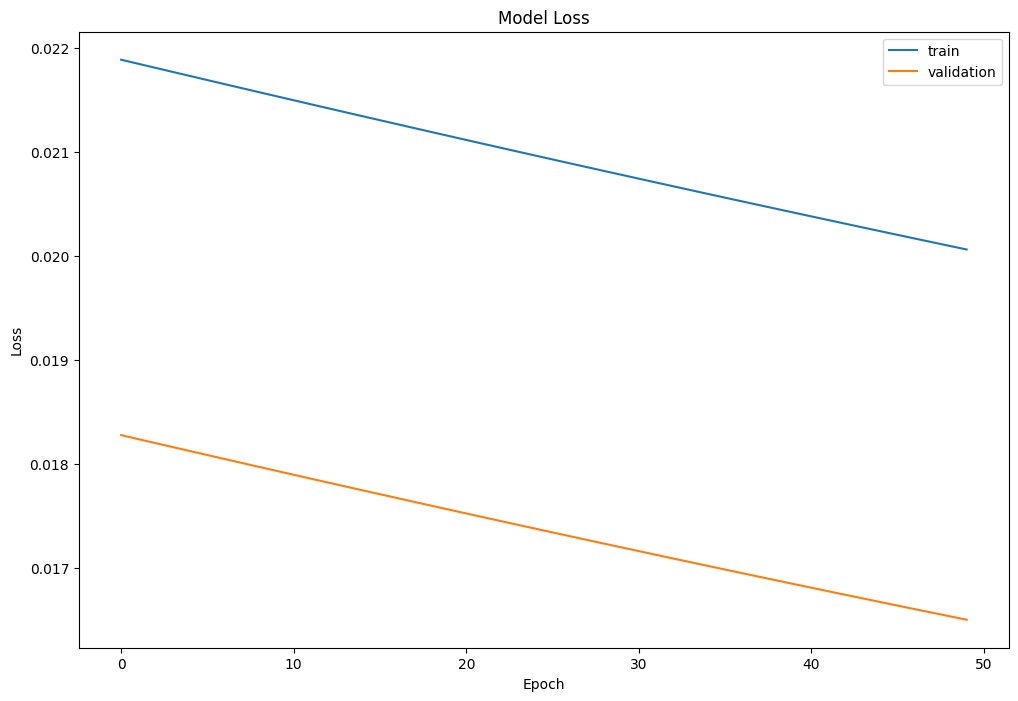

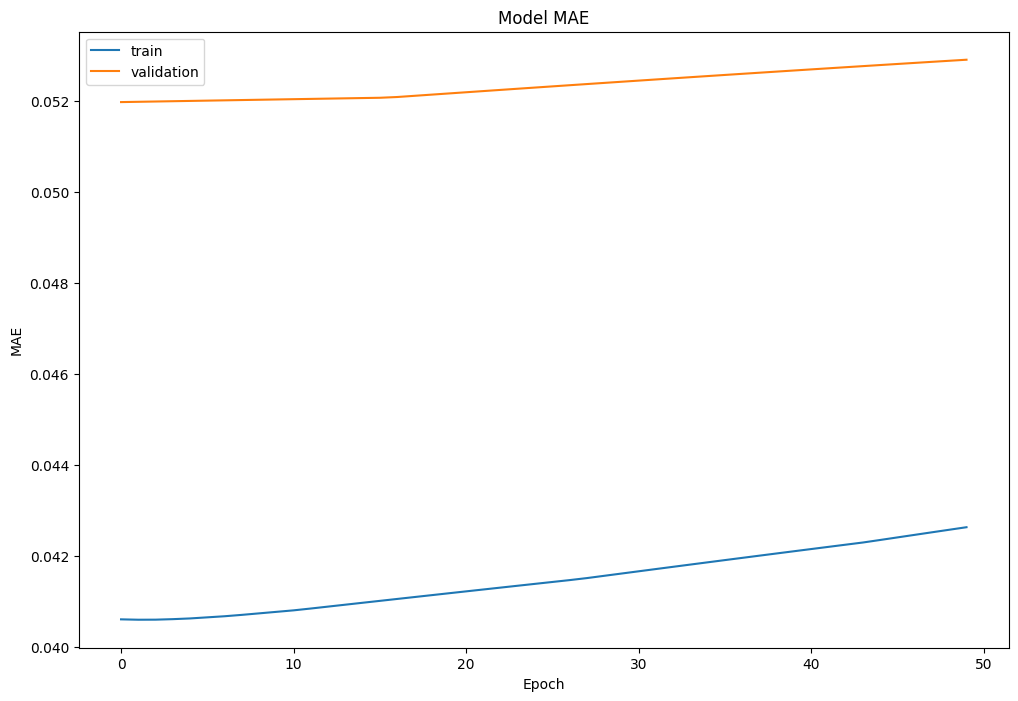

In [74]:
df_loss_acc = pd.DataFrame(history.history)

# Loss
df_loss = df_loss_acc[['loss', 'val_loss']].rename(columns={'loss':'train','val_loss':'validation'})
df_loss.plot(title='Model Loss', figsize=(12,8))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# MAE
df_mae = df_loss_acc[['mae', 'val_mae']].rename(columns={'mae':'train','val_mae':'validation'})
df_mae.plot(title='Model MAE', figsize=(12,8))
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


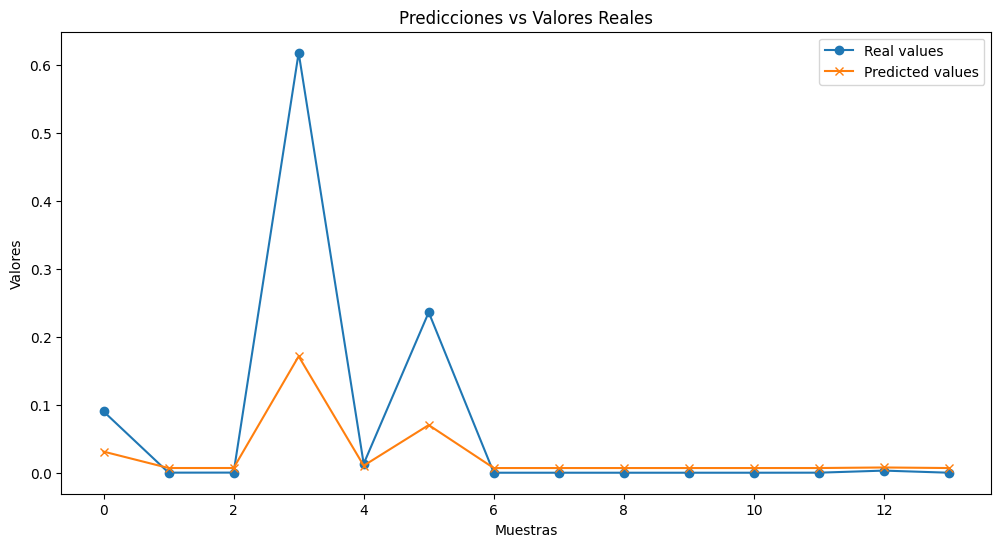

In [75]:

y_pred = model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(Y_test, label='Real values', marker='o')
plt.plot(y_pred, label='Predicted values', marker='x')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.legend()
plt.show()